In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from textblob import TextBlob

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Input, Layer
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import backend as K
from tqdm import tqdm


from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, balanced_accuracy_score, make_scorer
)
from sklearn.base import clone

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")


# NLP (kept only to mirror your original structure)
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Models / ML utils
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    precision_score, recall_score, f1_score, balanced_accuracy_score, make_scorer
)
from sklearn.base import clone

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix, make_scorer
)
from sklearn.base import clone
from statistics import mean

# Repro
RND = 42
np.random.seed(RND)

# ============================
# NLTK resources (parity with your script)
# ============================

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving upload_DJIA_table.csv to upload_DJIA_table.csv


In [ ]:
df_news = pd.read_csv("Combined_News_DJIA.csv")
df_stock = pd.read_csv("upload_DJIA_table.csv")

# **FinBERT-Based Daily News Sentiment Extraction **

In [ ]:
# FinBERT sentiment analysis initialization

from transformers import AutoTokenizer, AutoModelForSequenceClassification,pipeline

tokenizer = AutoTokenizer.from_pretrained('ProsusAI/finbert')  #takes raw text and converts it into tokens
model = AutoModelForSequenceClassification.from_pretrained('ProsusAI/finbert') #loads a pretrained model designed for classification tasks like sentiment
                                                                               # ProsusAI/finbert is a BERT model fine-tuned on financial text corpora
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer) # combines the tokenizer and model


/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
# FinBERT sentiment scoring function
# function takes heading and converts FinBERT’s output into a numeric score between −1 (negative) and +1 (positive)

def FinBERT_sentiment_score(heading):

    # Compute sentiment score using pretrained FinBERT on -1 to 1 scale.

    result = nlp(heading)
    label = result[0]['label']
    score = result[0]['score']

    if label.lower() == "positive":
        return score
    elif label.lower() == "negative":
        return -score
    else:
        return 0

# If FinBERT says positive, return a positive number between 0 and 1
# If it says negative, return a negative number between −1 and 0
# If it says neutral, return 0

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
# Sentiment scoring with progress bar

# Create an empty list to store the daily FinBERT sentiment scores
BERT_sentiment = []

# Loop through every row in the news DataFrame with a progress bar
for i in tqdm(range(len(df_news)), desc="Processing FinBERT Sentiment"):
  # Get all headlines for the i-th day (exclude the first column 'Date')
    news_list = df_news.iloc[i, 1:].tolist()  # Exclude date column
    news_list = [text for text in news_list if text != '0' and isinstance(text, str)]

    if len(news_list) == 0:
        BERT_sentiment.append(0)
    else:
      # Apply FinBERT_sentiment_score() to each headline of the day
        scores = [FinBERT_sentiment_score(text) for text in news_list]

        # Compute the average sentiment score for all headlines of that day
        average_score = sum(scores) / len(scores)

         # Append the daily average score to the results list
        BERT_sentiment.append(average_score)



Processing FinBERT Sentiment: 100%|██████████| 1989/1989 [2:03:19<00:00,  3.72s/it]


In [ ]:
# Add to DataFrame
df_news['FinBERT_score'] = BERT_sentiment

# Save to CSV
df_news.to_csv("sentiment df.csv", index=False)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sentiment df.csv to sentiment df.csv


In [ ]:
df_sent=pd.read_csv("sentiment df.csv")

In [ ]:
df_sent.head()

,Date,Label,clean text,FinBERT_score
0,2008-08-08,0,georgia down two russian warplane country move...,-0.243396
1,2008-08-11,1,wont america nato help u wont help u help iraq...,-0.059405
2,2008-08-12,0,remember adorable year old sang opening ceremo...,-0.123957
3,2008-08-13,0,u refuse israel weapon attack iran report pres...,-0.158370
4,2008-08-14,1,expert admit legalise drug war south osetia pi...,-0.036925


In [ ]:
df_sent["Date"]  = pd.to_datetime(df_sent["Date"], errors="coerce")   # Convert the Date column in the sentiment data to proper datetime format
df_stock["Date"] = pd.to_datetime(df_stock["Date"], errors="coerce")


df_sent  = df_sent.sort_values("Date").reset_index(drop=True)        # Sort the sentiment data by date and reset the index
df_stock = df_stock.sort_values("Date").reset_index(drop=True)       # Sort the stock data by date and reset the index


In [ ]:

# Create a clean dataframe with just Date and the daily FinBERT sentiment score
daily_finb = df_sent[["Date","Label", "FinBERT_score"]].copy()

In [ ]:

# Merge with prices
# Join the two tables (daily_finb with sentiment and stock_df with prices) by the Date column
df = pd.merge(daily_finb, df_stock, on="Date", how="inner").sort_values("Date").reset_index(drop=True)

In [ ]:
df.head()

,Date,Label,FinBERT_score,Open,High,Low,Close,Volume,Adj Close
0,2008-08-08,0,-0.243396,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312
1,2008-08-11,1,-0.059405,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
2,2008-08-12,0,-0.123957,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
3,2008-08-13,0,-0.158370,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
4,2008-08-14,1,-0.036925,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688


In [ ]:
df.columns

Index(['Date', 'Label', 'FinBERT_score', 'Open', 'High', 'Low', 'Close',
       'Volume', 'Adj Close'],
      dtype='object')

In [ ]:

# Check that the merged table has the Adjusted Close price column. If it’s missing, stop with a clear error message
if "Adj Close" not in df.columns:
    raise ValueError("Expected 'Adj Close' in stock table.")


# Classification


In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix, make_scorer
)
from sklearn.base import clone
from statistics import mean

# -----------------------------
# Settings (you can tweak)
# -----------------------------
SPLIT_DATE   = pd.Timestamp("2015-01-01")  # train < 2015, test >= 2015
N_SPLITS     = 5
RND          = 42
HORIZON_DAYS = 1                           # try 1 or 5
K_OPTIONS    = [8, 12, 16, 20, 30, 40]     # SelectKBest grid
THR_GRID     = np.linspace(0.2,0.8,61)

np.random.seed(RND)

# =============================
# Prepare df
# =============================
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.sort_values("Date").reset_index(drop=True)

need_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
             'FinBERT_score']

missing = [c for c in need_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in price table: {missing}")

for c in need_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna(subset=["Date","Adj Close"]).reset_index(drop=True)

# -----------------------------
# Helpers: technicals and rolling sentiment blocks
# -----------------------------
def rsi(series, n=14):
    d = series.diff()
    up = d.clip(lower=0).rolling(n).mean()
    dn = (-d.clip(upper=0)).rolling(n).mean()
    rs = up / (dn + 1e-12)
    return 100 - 100/(1+rs)

def macd(series, fast=12, slow=26, signal=9):
    ema_f = series.ewm(span=fast, adjust=False).mean()
    ema_s = series.ewm(span=slow, adjust=False).mean()
    line = ema_f - ema_s
    sig  = line.ewm(span=signal, adjust=False).mean()
    return line, sig, line - sig

def roll_feats(s, wins=(3,5,10)):
    d = {"raw": s}
    for w in wins:
        d[f"mean{w}"] = s.rolling(w).mean()
        d[f"std{w}"]  = s.rolling(w).std()
        d[f"ema{w}"]  = s.ewm(span=w, adjust=False).mean()
        d[f"chg{w}"]  = s.diff(w)
    d["z20"] = (s - s.rolling(20).mean())/(s.rolling(20).std()+1e-12)
    d["q25"] = s.rolling(10).quantile(0.25)
    d["q75"] = s.rolling(10).quantile(0.75)
    return d

# -----------------------------
# Build same-day features (lag later)
# -----------------------------
px = pd.to_numeric(df["Adj Close"], errors="coerce")

# technicals
ret1  = px.pct_change()
ret5  = px.pct_change(5)
ret10 = px.pct_change(10)
vol10 = ret1.rolling(10).std()
vol20 = ret1.rolling(20).std()
rsi14 = rsi(px,14)
macd_line, macd_sig, macd_hist = macd(px)

# FinBERT sentiment
FinBERT_score = df["FinBERT_score"]
FinBERT_score_d = roll_feats(FinBERT_score)

dow   = df["Date"].dt.dayofweek.astype(float)
month = df["Date"].dt.month.astype(float)

F = pd.DataFrame({
    "Date": df["Date"],
    # raw OHLCV
    "Open":  df["Open"], "High": df["High"], "Low": df["Low"],
    "Close": df["Close"], "Adj_Close": px, "Volume": df["Volume"],
    # technicals
    "ret1":ret1, "ret5":ret5, "ret10":ret10,
    "vol10":vol10, "vol20":vol20,
    "rsi14": rsi14,
    "macd": macd_line, "macd_signal": macd_sig, "macd_hist": macd_hist,
    # calendar
    "dow": dow, "month": month
})

def add_block(prefix, dct):
    for k,v in dct.items():
        F[f"{prefix}_{k}"] = v

add_block("FinBERT_score", FinBERT_score_d)

# -----------------------------
# Target with horizon — CORRECT ALIGNMENT
# -----------------------------
if HORIZON_DAYS < 1:
    raise ValueError("HORIZON_DAYS must be >= 1")

# Features at Date t (after lag) will use info up to t-1.
# Target at Date t = return from (t-1) -> (t-1+HORIZON_DAYS)
future_return = px.shift(-(HORIZON_DAYS - 1)) / px.shift(1) - 1.0
y_target = (future_return > 0).astype(int)

target_df = pd.DataFrame({"Date": df["Date"], "y": y_target.values})

# -----------------------------
# Lag everything by 1 day (t-1 info only), then merge target
# -----------------------------
lagged = F.copy()
for col in lagged.columns:
    if col != "Date":
        lagged[col] = lagged[col].shift(1)

lagged = lagged.merge(target_df, on="Date", how="left")
lagged = lagged.dropna().reset_index(drop=True)

# -----------------------------
# Train/Test split (no shuffle) + robust fallback
# -----------------------------
train = lagged[lagged["Date"] <  SPLIT_DATE].copy()
test  = lagged[lagged["Date"] >= SPLIT_DATE].copy()

if len(train) == 0 or len(test) == 0:
    dyn_split = lagged["Date"].iloc[int(len(lagged)*0.8)]
    print(f"[WARN] Using dynamic split at {dyn_split.date()} (80/20).")
    train = lagged[lagged["Date"] <  dyn_split].copy()
    test  = lagged[lagged["Date"] >= dyn_split].copy()

feature_cols = [c for c in lagged.columns if c not in ["Date","y"]]
X_train = train[feature_cols].to_numpy()
y_train = train["y"].astype(int).to_numpy()
X_test  = test[feature_cols].to_numpy()
y_test  = test["y"].astype(int).to_numpy()

print(f"Train n={len(y_train)}  Test n={len(y_test)}  |  "
      f"P(up)_train={y_train.mean():.3f}  P(up)_test={y_test.mean():.3f}  "
      f"| Horizon={HORIZON_DAYS}d")

# -----------------------------
# TimeSeriesSplit + scorer (shrink folds if needed)
# -----------------------------
N_SPLITS_EFF = min(N_SPLITS, max(2, len(y_train)-1))
if N_SPLITS_EFF < N_SPLITS:
    print(f"[INFO] Reducing CV folds from {N_SPLITS} to {N_SPLITS_EFF}.")
tscv = TimeSeriesSplit(n_splits=N_SPLITS_EFF)
cv_splits = list(tscv.split(X_train, y_train))
scorer_balacc = make_scorer(balanced_accuracy_score)

# -----------------------------
# Models & grids (SelectKBest inside tuned pipelines)
# -----------------------------
def pipe_with_selector(est):
    return Pipeline([
        ("sc", StandardScaler()),
        ("sel", SelectKBest(score_func=mutual_info_classif, k=10)),
        ("clf", est)
    ])

pipe_lr  = Pipeline([("sc", StandardScaler()),
                     ("clf", LogisticRegression(max_iter=2000,
                                               class_weight="balanced",
                                               random_state=RND))])
pipe_lda = Pipeline([("sc", StandardScaler()),
                     ("clf", LinearDiscriminantAnalysis())])
rf = RandomForestClassifier(n_estimators=600,
                            random_state=RND,
                            n_jobs=-1)

pipe_svm = pipe_with_selector(SVC(probability=True,
                                  class_weight="balanced",
                                  random_state=RND))
pipe_knn = pipe_with_selector(KNeighborsClassifier())
nb = GaussianNB()

param_grids = {
    "KNN": {"est": pipe_knn,
            "grid": {
                "sel__k": K_OPTIONS,
                "clf__n_neighbors":[3,5,7,9,11,15,21],
                "clf__weights":["uniform","distance"],
                "clf__p":[1,2]
            }},
    "SVM": {"est": pipe_svm,
            "grid": [
                {"sel__k": K_OPTIONS,
                 "clf__kernel":["linear"],
                 "clf__C":[0.25,0.5,1,2,5]},
                {"sel__k": K_OPTIONS,
                 "clf__kernel":["rbf"],
                 "clf__C":[0.5,1,2,5,10],
                 "clf__gamma":["scale","auto", 0.1, 0.05, 0.02]}
            ]},
    "NaiveBayes": {"est": nb,
                   "grid": {"var_smoothing":[1e-9,1e-8,1e-7,1e-6,1e-5]}},
}
fixed_models = {
    "LogisticRegression": pipe_lr,
    "LDA": pipe_lda,
    "RandomForest": rf
}

# -----------------------------
# Utilities: decision scores + threshold search
# -----------------------------
def decision_scores(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:,1]
    if hasattr(model, "decision_function"):
        s = model.decision_function(X)
        s_min, s_max = np.min(s), np.max(s)
        if s_max - s_min < 1e-12:
            return np.full_like(s, 0.5, dtype=float)
        return (s - s_min) / (s_max - s_min)
    yhat = model.predict(X).astype(float)
    return (yhat - yhat.min()) / (yhat.max() - yhat.min() + 1e-12)

def cv_find_threshold(clf, X, y, cv_splits, grid=THR_GRID):
    ts = []
    for tr, va in cv_splits:
        m = clone(clf).fit(X[tr], y[tr])
        s = decision_scores(m, X[va])
        if np.allclose(s, s[0]):
            ts.append(0.5); continue
        best_t, best_sc = 0.5, -1
        for t in grid:
            yhat = (s >= t).astype(int)
            sc = balanced_accuracy_score(y[va], yhat)
            if sc > best_sc:
                best_sc, best_t = sc, t
        ts.append(best_t)
    return float(np.mean(ts))

# -----------------------------
# Tune base models + thresholds (train only)
# -----------------------------
cv_rows, best_models, best_thresholds, cv_balacc = [], {}, {}, {}

print("\n=== Tuning (Balanced Accuracy; shared time folds) ===")
for name, cfg in param_grids.items():
    gs = GridSearchCV(cfg["est"], cfg["grid"],
                      scoring=scorer_balacc,
                      cv=cv_splits,
                      n_jobs=-1,
                      refit=True)
    gs.fit(X_train, y_train)
    best_models[name] = gs.best_estimator_
    thr = cv_find_threshold(gs.best_estimator_, X_train, y_train, cv_splits)
    best_thresholds[name] = thr
    cv_balacc[name] = float(gs.best_score_)
    cv_rows.append({"Model":name,
                    "BestParams":gs.best_params_,
                    "CV_BalAcc":round(gs.best_score_,4),
                    "CV_Thr":round(thr,3)})
    print(f"{name}: CV BalAcc={gs.best_score_:.4f} | thr={thr:.3f} | {gs.best_params_}")

for name, mdl in fixed_models.items():
    scores=[]
    for tr, va in cv_splits:
        m = clone(mdl).fit(X_train[tr], y_train[tr])
        yhat = m.predict(X_train[va])
        scores.append(balanced_accuracy_score(y_train[va], yhat))
    thr = cv_find_threshold(clone(mdl), X_train, y_train, cv_splits)
    best_models[name] = clone(mdl).fit(X_train, y_train)
    best_thresholds[name] = thr
    cv_balacc[name] = float(mean(scores))
    cv_rows.append({"Model":name,
                    "BestParams":"(none)",
                    "CV_BalAcc":round(mean(scores),4),
                    "CV_Thr":round(thr,3)})
    print(f"{name}: CV BalAcc={mean(scores):.4f} | thr={thr:.3f}")

cv_summary = pd.DataFrame(cv_rows).sort_values("CV_BalAcc", ascending=False)
print("\n=== CV summary (train only) ===")
print(cv_summary)

# -----------------------------
# Final held-out test per base model
# -----------------------------
perfs = []
for name, mdl in best_models.items():
    mdl.fit(X_train, y_train)
    s = decision_scores(mdl, X_test)
    thr = best_thresholds[name]
    tstar = 0.5 if not np.isfinite(thr) else thr
    y_pred = (s >= tstar).astype(int)

    perfs.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred),4),
        "BalancedAcc": round(balanced_accuracy_score(y_test, y_pred),4),
        "Precision_w": round(precision_score(y_test, y_pred,
                                             average="weighted",
                                             zero_division=0),4),
        "Recall_w": round(recall_score(y_test, y_pred,
                                       average="weighted",
                                       zero_division=0),4),
        "F1_w": round(f1_score(y_test, y_pred,
                               average="weighted",
                               zero_division=0),4),
        "Threshold": round(tstar,3)
    })

    print(f"\n{name} — TEST (thr={tstar:.3f})")
    print(classification_report(y_test, y_pred,
                                digits=3, zero_division=0))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

base_results = pd.DataFrame(perfs).sort_values("BalancedAcc", ascending=False)
print("\n=== Base model Test results (held-out) ===")
print(base_results)

# -----------------------------
# OOF Stacking (LogReg) — leakage-safe
# -----------------------------
stack_members = [m for m in ["SVM","KNN","RandomForest","LogisticRegression"]
                 if m in best_models]
if len(stack_members) >= 2:
    oof = np.zeros((len(y_train), len(stack_members)), dtype=float)
    for j, mname in enumerate(stack_members):
        est = best_models[mname]
        for tr, va in cv_splits:
            est_fold = clone(est).fit(X_train[tr], y_train[tr])
            oof[va, j] = decision_scores(est_fold, X_train[va])

    meta = LogisticRegression(max_iter=2000,
                              class_weight="balanced",
                              random_state=RND)
    meta.fit(oof, y_train)

    # threshold for meta on OOF
    best_t, best_sc = 0.5, -1
    meta_tr = meta.predict_proba(oof)[:,1]
    for t in THR_GRID:
        sc = balanced_accuracy_score(y_train, (meta_tr >= t).astype(int))
        if sc > best_sc:
            best_sc, best_t = sc, t

    # test-time meta
    test_probs = []
    for mname in stack_members:
        best_models[mname].fit(X_train, y_train)
        test_probs.append(decision_scores(best_models[mname], X_test))
    test_probs = np.vstack(test_probs).T

    meta_scores = meta.predict_proba(test_probs)[:,1]
    y_pred_meta = (meta_scores >= best_t).astype(int)

    meta_row = {
        "Model": "OOF-Stack(LogReg)",
        "Accuracy": round(accuracy_score(y_test, y_pred_meta),4),
        "BalancedAcc": round(balanced_accuracy_score(y_test, y_pred_meta),4),
        "Precision_w": round(precision_score(y_test, y_pred_meta,
                                             average="weighted",
                                             zero_division=0),4),
        "Recall_w": round(recall_score(y_test, y_pred_meta,
                                       average="weighted",
                                       zero_division=0),4),
        "F1_w": round(f1_score(y_test, y_pred_meta,
                               average="weighted",
                               zero_division=0),4),
        "Threshold": round(best_t,3)
    }
    print(f"\nOOF-Stack(LogReg) — TEST (thr={best_t:.3f})")
    print(classification_report(y_test, y_pred_meta,
                                digits=3, zero_division=0))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_meta))

    final_results = pd.concat([base_results, pd.DataFrame([meta_row])],
                              ignore_index=True)\
                      .sort_values("BalancedAcc", ascending=False)
else:
    final_results = base_results

print("\n=== Final Test results (held-out) ===")
print(final_results)

# -----------------------------
# Baselines (for context)
# -----------------------------
always_up = np.ones_like(y_test)
mom_pred = (test["ret1"].to_numpy() > 0).astype(int) if "ret1" in test.columns else np.ones_like(y_test)

print("\n=== Baselines ===")
print("Always up      -> Acc=", round(accuracy_score(y_test, always_up),4),
      " BalAcc=", round(balanced_accuracy_score(y_test, always_up),4))
print("Momentum (t-1) -> Acc=", round(accuracy_score(y_test, mom_pred),4),
      " BalAcc=", round(balanced_accuracy_score(y_test, mom_pred),4))


Train n=1590  Test n=378  |  P(up)_train=0.542  P(up)_test=0.508  | Horizon=1d

=== Tuning (Balanced Accuracy; shared time folds) ===
KNN: CV BalAcc=0.5261 | thr=0.538 | {'clf__n_neighbors': 15, 'clf__p': 2, 'clf__weights': 'distance', 'sel__k': 30}
SVM: CV BalAcc=0.5207 | thr=0.508 | {'clf__C': 1, 'clf__gamma': 0.02, 'clf__kernel': 'rbf', 'sel__k': 12}
NaiveBayes: CV BalAcc=0.5216 | thr=0.542 | {'var_smoothing': 1e-09}
LogisticRegression: CV BalAcc=0.4977 | thr=0.516
LDA: CV BalAcc=0.5083 | thr=0.520
RandomForest: CV BalAcc=0.5195 | thr=0.436

=== CV summary (train only) ===
                Model                                         BestParams  \
0                 KNN  {'clf__n_neighbors': 15, 'clf__p': 2, 'clf__we...   
2          NaiveBayes                           {'var_smoothing': 1e-09}   
1                 SVM  {'clf__C': 1, 'clf__gamma': 0.02, 'clf__kernel...   
5        RandomForest                                             (none)   
4                 LDA                

**horizon=5 day**

In [ ]:


from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix, make_scorer
)
from sklearn.base import clone
from statistics import mean

# -----------------------------
# Settings (you can tweak)
# -----------------------------
SPLIT_DATE   = pd.Timestamp("2015-01-01")  # train < 2015, test >= 2015
N_SPLITS     = 5
RND          = 42
HORIZON_DAYS = 5                           # try 1 or 5
K_OPTIONS    = [8, 12, 16, 20, 30, 40]     # SelectKBest grid
THR_GRID     = np.linspace(0.2,0.8,61)

np.random.seed(RND)

# =============================
# Prepare df
# =============================
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.sort_values("Date").reset_index(drop=True)

need_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
             'FinBERT_score']

missing = [c for c in need_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing columns in price table: {missing}")

for c in need_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df = df.dropna(subset=["Date","Adj Close"]).reset_index(drop=True)

# -----------------------------
# Helpers: technicals and rolling sentiment blocks
# -----------------------------
def rsi(series, n=14):
    d = series.diff()
    up = d.clip(lower=0).rolling(n).mean()
    dn = (-d.clip(upper=0)).rolling(n).mean()
    rs = up / (dn + 1e-12)
    return 100 - 100/(1+rs)

def macd(series, fast=12, slow=26, signal=9):
    ema_f = series.ewm(span=fast, adjust=False).mean()
    ema_s = series.ewm(span=slow, adjust=False).mean()
    line = ema_f - ema_s
    sig  = line.ewm(span=signal, adjust=False).mean()
    return line, sig, line - sig

def roll_feats(s, wins=(3,5,10)):
    d = {"raw": s}
    for w in wins:
        d[f"mean{w}"] = s.rolling(w).mean()
        d[f"std{w}"]  = s.rolling(w).std()
        d[f"ema{w}"]  = s.ewm(span=w, adjust=False).mean()
        d[f"chg{w}"]  = s.diff(w)
    d["z20"] = (s - s.rolling(20).mean())/(s.rolling(20).std()+1e-12)
    d["q25"] = s.rolling(10).quantile(0.25)
    d["q75"] = s.rolling(10).quantile(0.75)
    return d

# -----------------------------
# Build same-day features (lag later)
# -----------------------------
px = pd.to_numeric(df["Adj Close"], errors="coerce")

# technicals
ret1  = px.pct_change()
ret5  = px.pct_change(5)
ret10 = px.pct_change(10)
vol10 = ret1.rolling(10).std()
vol20 = ret1.rolling(20).std()
rsi14 = rsi(px,14)
macd_line, macd_sig, macd_hist = macd(px)

# FinBERT sentiment
FinBERT_score = df["FinBERT_score"]
FinBERT_score_d = roll_feats(FinBERT_score)

dow   = df["Date"].dt.dayofweek.astype(float)
month = df["Date"].dt.month.astype(float)

F = pd.DataFrame({
    "Date": df["Date"],
    # raw OHLCV
    "Open":  df["Open"], "High": df["High"], "Low": df["Low"],
    "Close": df["Close"], "Adj_Close": px, "Volume": df["Volume"],
    # technicals
    "ret1":ret1, "ret5":ret5, "ret10":ret10,
    "vol10":vol10, "vol20":vol20,
    "rsi14": rsi14,
    "macd": macd_line, "macd_signal": macd_sig, "macd_hist": macd_hist,
    # calendar
    "dow": dow, "month": month
})

def add_block(prefix, dct):
    for k,v in dct.items():
        F[f"{prefix}_{k}"] = v

add_block("FinBERT_score", FinBERT_score_d)

# -----------------------------
# Target with horizon — CORRECT ALIGNMENT
# -----------------------------
if HORIZON_DAYS < 1:
    raise ValueError("HORIZON_DAYS must be >= 1")

# Features at Date t (after lag) will use info up to t-1.
# Target at Date t = return from (t-1) -> (t-1+HORIZON_DAYS)
future_return = px.shift(-(HORIZON_DAYS - 1)) / px.shift(1) - 1.0
y_target = (future_return > 0).astype(int)

target_df = pd.DataFrame({"Date": df["Date"], "y": y_target.values})

# -----------------------------
# Lag everything by 1 day (t-1 info only), then merge target
# -----------------------------
lagged = F.copy()
for col in lagged.columns:
    if col != "Date":
        lagged[col] = lagged[col].shift(1)

lagged = lagged.merge(target_df, on="Date", how="left")
lagged = lagged.dropna().reset_index(drop=True)

# -----------------------------
# Train/Test split (no shuffle) + robust fallback
# -----------------------------
train = lagged[lagged["Date"] <  SPLIT_DATE].copy()
test  = lagged[lagged["Date"] >= SPLIT_DATE].copy()

if len(train) == 0 or len(test) == 0:
    dyn_split = lagged["Date"].iloc[int(len(lagged)*0.8)]
    print(f"[WARN] Using dynamic split at {dyn_split.date()} (80/20).")
    train = lagged[lagged["Date"] <  dyn_split].copy()
    test  = lagged[lagged["Date"] >= dyn_split].copy()

feature_cols = [c for c in lagged.columns if c not in ["Date","y"]]
X_train = train[feature_cols].to_numpy()
y_train = train["y"].astype(int).to_numpy()
X_test  = test[feature_cols].to_numpy()
y_test  = test["y"].astype(int).to_numpy()

print(f"Train n={len(y_train)}  Test n={len(y_test)}  |  "
      f"P(up)_train={y_train.mean():.3f}  P(up)_test={y_test.mean():.3f}  "
      f"| Horizon={HORIZON_DAYS}d")

# -----------------------------
# TimeSeriesSplit + scorer (shrink folds if needed)
# -----------------------------
N_SPLITS_EFF = min(N_SPLITS, max(2, len(y_train)-1))
if N_SPLITS_EFF < N_SPLITS:
    print(f"[INFO] Reducing CV folds from {N_SPLITS} to {N_SPLITS_EFF}.")
tscv = TimeSeriesSplit(n_splits=N_SPLITS_EFF)
cv_splits = list(tscv.split(X_train, y_train))
scorer_balacc = make_scorer(balanced_accuracy_score)

# -----------------------------
# Models & grids (SelectKBest inside tuned pipelines)
# -----------------------------
def pipe_with_selector(est):
    return Pipeline([
        ("sc", StandardScaler()),
        ("sel", SelectKBest(score_func=mutual_info_classif, k=10)),
        ("clf", est)
    ])

pipe_lr  = Pipeline([("sc", StandardScaler()),
                     ("clf", LogisticRegression(max_iter=2000,
                                               class_weight="balanced",
                                               random_state=RND))])
pipe_lda = Pipeline([("sc", StandardScaler()),
                     ("clf", LinearDiscriminantAnalysis())])
rf = RandomForestClassifier(n_estimators=600,
                            random_state=RND,
                            n_jobs=-1)

pipe_svm = pipe_with_selector(SVC(probability=True,
                                  class_weight="balanced",
                                  random_state=RND))
pipe_knn = pipe_with_selector(KNeighborsClassifier())
nb = GaussianNB()

param_grids = {
    "KNN": {"est": pipe_knn,
            "grid": {
                "sel__k": K_OPTIONS,
                "clf__n_neighbors":[3,5,7,9,11,15,21],
                "clf__weights":["uniform","distance"],
                "clf__p":[1,2]
            }},
    "SVM": {"est": pipe_svm,
            "grid": [
                {"sel__k": K_OPTIONS,
                 "clf__kernel":["linear"],
                 "clf__C":[0.25,0.5,1,2,5]},
                {"sel__k": K_OPTIONS,
                 "clf__kernel":["rbf"],
                 "clf__C":[0.5,1,2,5,10],
                 "clf__gamma":["scale","auto", 0.1, 0.05, 0.02]}
            ]},
    "NaiveBayes": {"est": nb,
                   "grid": {"var_smoothing":[1e-9,1e-8,1e-7,1e-6,1e-5]}},
}
fixed_models = {
    "LogisticRegression": pipe_lr,
    "LDA": pipe_lda,
    "RandomForest": rf
}

# -----------------------------
# Utilities: decision scores + threshold search
# -----------------------------
def decision_scores(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:,1]
    if hasattr(model, "decision_function"):
        s = model.decision_function(X)
        s_min, s_max = np.min(s), np.max(s)
        if s_max - s_min < 1e-12:
            return np.full_like(s, 0.5, dtype=float)
        return (s - s_min) / (s_max - s_min)
    yhat = model.predict(X).astype(float)
    return (yhat - yhat.min()) / (yhat.max() - yhat.min() + 1e-12)

def cv_find_threshold(clf, X, y, cv_splits, grid=THR_GRID):
    ts = []
    for tr, va in cv_splits:
        m = clone(clf).fit(X[tr], y[tr])
        s = decision_scores(m, X[va])
        if np.allclose(s, s[0]):
            ts.append(0.5); continue
        best_t, best_sc = 0.5, -1
        for t in grid:
            yhat = (s >= t).astype(int)
            sc = balanced_accuracy_score(y[va], yhat)
            if sc > best_sc:
                best_sc, best_t = sc, t
        ts.append(best_t)
    return float(np.mean(ts))

# -----------------------------
# Tune base models + thresholds (train only)
# -----------------------------
cv_rows, best_models, best_thresholds, cv_balacc = [], {}, {}, {}

print("\n=== Tuning (Balanced Accuracy; shared time folds) ===")
for name, cfg in param_grids.items():
    gs = GridSearchCV(cfg["est"], cfg["grid"],
                      scoring=scorer_balacc,
                      cv=cv_splits,
                      n_jobs=-1,
                      refit=True)
    gs.fit(X_train, y_train)
    best_models[name] = gs.best_estimator_
    thr = cv_find_threshold(gs.best_estimator_, X_train, y_train, cv_splits)
    best_thresholds[name] = thr
    cv_balacc[name] = float(gs.best_score_)
    cv_rows.append({"Model":name,
                    "BestParams":gs.best_params_,
                    "CV_BalAcc":round(gs.best_score_,4),
                    "CV_Thr":round(thr,3)})
    print(f"{name}: CV BalAcc={gs.best_score_:.4f} | thr={thr:.3f} | {gs.best_params_}")

for name, mdl in fixed_models.items():
    scores=[]
    for tr, va in cv_splits:
        m = clone(mdl).fit(X_train[tr], y_train[tr])
        yhat = m.predict(X_train[va])
        scores.append(balanced_accuracy_score(y_train[va], yhat))
    thr = cv_find_threshold(clone(mdl), X_train, y_train, cv_splits)
    best_models[name] = clone(mdl).fit(X_train, y_train)
    best_thresholds[name] = thr
    cv_balacc[name] = float(mean(scores))
    cv_rows.append({"Model":name,
                    "BestParams":"(none)",
                    "CV_BalAcc":round(mean(scores),4),
                    "CV_Thr":round(thr,3)})
    print(f"{name}: CV BalAcc={mean(scores):.4f} | thr={thr:.3f}")

cv_summary = pd.DataFrame(cv_rows).sort_values("CV_BalAcc", ascending=False)
print("\n=== CV summary (train only) ===")
print(cv_summary)

# -----------------------------
# Final held-out test per base model
# -----------------------------
perfs = []
for name, mdl in best_models.items():
    mdl.fit(X_train, y_train)
    s = decision_scores(mdl, X_test)
    thr = best_thresholds[name]
    tstar = 0.5 if not np.isfinite(thr) else thr
    y_pred = (s >= tstar).astype(int)

    perfs.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred),4),
        "BalancedAcc": round(balanced_accuracy_score(y_test, y_pred),4),
        "Precision_w": round(precision_score(y_test, y_pred,
                                             average="weighted",
                                             zero_division=0),4),
        "Recall_w": round(recall_score(y_test, y_pred,
                                       average="weighted",
                                       zero_division=0),4),
        "F1_w": round(f1_score(y_test, y_pred,
                               average="weighted",
                               zero_division=0),4),
        "Threshold": round(tstar,3)
    })

    print(f"\n{name} — TEST (thr={tstar:.3f})")
    print(classification_report(y_test, y_pred,
                                digits=3, zero_division=0))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

base_results = pd.DataFrame(perfs).sort_values("BalancedAcc", ascending=False)
print("\n=== Base model Test results (held-out) ===")
print(base_results)

# -----------------------------
# OOF Stacking (LogReg) — leakage-safe
# -----------------------------
stack_members = [m for m in ["SVM","KNN","RandomForest","LogisticRegression"]
                 if m in best_models]
if len(stack_members) >= 2:
    oof = np.zeros((len(y_train), len(stack_members)), dtype=float)
    for j, mname in enumerate(stack_members):
        est = best_models[mname]
        for tr, va in cv_splits:
            est_fold = clone(est).fit(X_train[tr], y_train[tr])
            oof[va, j] = decision_scores(est_fold, X_train[va])

    meta = LogisticRegression(max_iter=2000,
                              class_weight="balanced",
                              random_state=RND)
    meta.fit(oof, y_train)

    # threshold for meta on OOF
    best_t, best_sc = 0.5, -1
    meta_tr = meta.predict_proba(oof)[:,1]
    for t in THR_GRID:
        sc = balanced_accuracy_score(y_train, (meta_tr >= t).astype(int))
        if sc > best_sc:
            best_sc, best_t = sc, t

    # test-time meta
    test_probs = []
    for mname in stack_members:
        best_models[mname].fit(X_train, y_train)
        test_probs.append(decision_scores(best_models[mname], X_test))
    test_probs = np.vstack(test_probs).T

    meta_scores = meta.predict_proba(test_probs)[:,1]
    y_pred_meta = (meta_scores >= best_t).astype(int)

    meta_row = {
        "Model": "OOF-Stack(LogReg)",
        "Accuracy": round(accuracy_score(y_test, y_pred_meta),4),
        "BalancedAcc": round(balanced_accuracy_score(y_test, y_pred_meta),4),
        "Precision_w": round(precision_score(y_test, y_pred_meta,
                                             average="weighted",
                                             zero_division=0),4),
        "Recall_w": round(recall_score(y_test, y_pred_meta,
                                       average="weighted",
                                       zero_division=0),4),
        "F1_w": round(f1_score(y_test, y_pred_meta,
                               average="weighted",
                               zero_division=0),4),
        "Threshold": round(best_t,3)
    }
    print(f"\nOOF-Stack(LogReg) — TEST (thr={best_t:.3f})")
    print(classification_report(y_test, y_pred_meta,
                                digits=3, zero_division=0))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_meta))

    final_results = pd.concat([base_results, pd.DataFrame([meta_row])],
                              ignore_index=True)\
                      .sort_values("BalancedAcc", ascending=False)
else:
    final_results = base_results

print("\n=== Final Test results (held-out) ===")
print(final_results)

# -----------------------------
# Baselines (for context)
# -----------------------------
always_up = np.ones_like(y_test)
mom_pred = (test["ret1"].to_numpy() > 0).astype(int) if "ret1" in test.columns else np.ones_like(y_test)

print("\n=== Baselines ===")
print("Always up      -> Acc=", round(accuracy_score(y_test, always_up),4),
      " BalAcc=", round(balanced_accuracy_score(y_test, always_up),4))
print("Momentum (t-1) -> Acc=", round(accuracy_score(y_test, mom_pred),4),
      " BalAcc=", round(balanced_accuracy_score(y_test, mom_pred),4))


Train n=1590  Test n=378  |  P(up)_train=0.586  P(up)_test=0.532  | Horizon=5d

=== Tuning (Balanced Accuracy; shared time folds) ===
KNN: CV BalAcc=0.5551 | thr=0.450 | {'clf__n_neighbors': 9, 'clf__p': 1, 'clf__weights': 'uniform', 'sel__k': 8}
SVM: CV BalAcc=0.5595 | thr=0.504 | {'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel': 'rbf', 'sel__k': 8}
NaiveBayes: CV BalAcc=0.5236 | thr=0.544 | {'var_smoothing': 1e-09}
LogisticRegression: CV BalAcc=0.5469 | thr=0.342
LDA: CV BalAcc=0.5468 | thr=0.456
RandomForest: CV BalAcc=0.5212 | thr=0.388

=== CV summary (train only) ===
                Model                                         BestParams  \
1                 SVM  {'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel...   
0                 KNN  {'clf__n_neighbors': 9, 'clf__p': 1, 'clf__wei...   
3  LogisticRegression                                             (none)   
4                 LDA                                             (none)   
2          NaiveBayes                    

#Regression

In [ ]:
df.columns

Index(['Date', 'Label', 'clean text', 'FinBERT_score', 'Open', 'High', 'Low',
       'Close', 'Volume', 'Adj Close', 'delta1', 'ret1', 'ret5', 'ret10',
       'vol10', 'vol20', 'RSI14', 'MACD', 'MACDsig', 'MACDhist', 'dow',
       'ret_next'],
      dtype='object')

In [ ]:
# Select features
features = ['FinBERT_score', 'Open', 'High', 'Low',
       'Close', 'Volume', 'ret1', 'ret5', 'ret10',
       'vol10', 'vol20', 'RSI14', 'MACD', 'MACDsig', 'MACDhist', 'dow']
target = 'Adj Close'

df = df.dropna(subset=features + [target]).reset_index(drop=True)

In [ ]:
# Time-based Train/Test Split
train = df[df['Date'] < '2015-01-01']
test  = df[df['Date'] >= '2015-01-01']

# Scaling
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train = X_scaler.fit_transform(train[features])
y_train = y_scaler.fit_transform(train[[target]])
X_test  = X_scaler.transform(test[features])
y_test  = y_scaler.transform(test[[target]])


In [ ]:
# Sequence Creation
# we creat sequences of time steps as input for the LSTM mode
SEQ_LEN = 30
def create_sequences(X, y, seq_len=SEQ_LEN):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len]) # input sequence of 10 days
        ys.append(y[i+seq_len]) # target is the value right after that sequence
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train, y_train, SEQ_LEN)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, SEQ_LEN)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)



# LSTM Model
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(SEQ_LEN, X_train_seq.shape[2])), # First LSTM layer with 128 units, returns full sequences for the next LSTM layer
    Dropout(0.1), # Dropout layer to prevent overfitting
    LSTM(64, return_sequences=True),  # Second LSTM layer with 64 units
    Dropout(0.1),
    LSTM(32), # Third (final) LSTM layer with 32 units, returns only the last output
    Dropout(0.1),  # Final Dropout layer before output
    Dense(1)
])
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [ ]:
# training Lstm model
history = model.fit(
    X_train_seq, y_train_seq, # Training input sequences and target values
    epochs=200,
    batch_size=32,
    validation_split=0.1,
    # Use EarlyStopping to stop training if validation loss doesn't improve for 20 epochs
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)],
    verbose=1  # prints a progress bar for each epoch during training
)

Epoch 1/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - loss: 0.0717 - val_loss: 0.0055
Epoch 2/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 0.0033 - val_loss: 0.0050
Epoch 3/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - loss: 0.0031 - val_loss: 8.7410e-04
Epoch 4/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0020 - val_loss: 7.2147e-04
Epoch 5/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 6/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 7/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 8/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0018 - val_loss: 0.0014
Epoch 9/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 10/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 11/200
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.0018 - val_loss: 6.0800e-04
Epoch 12/200
44/44 ━━━━━━━━━━━━━━━━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
📊 MSE: 45850.8379
📉 RMSE: 214.1281
📈 MAE: 165.7162
🎯 R² Score: 0.8912
MAPE: 0.96%


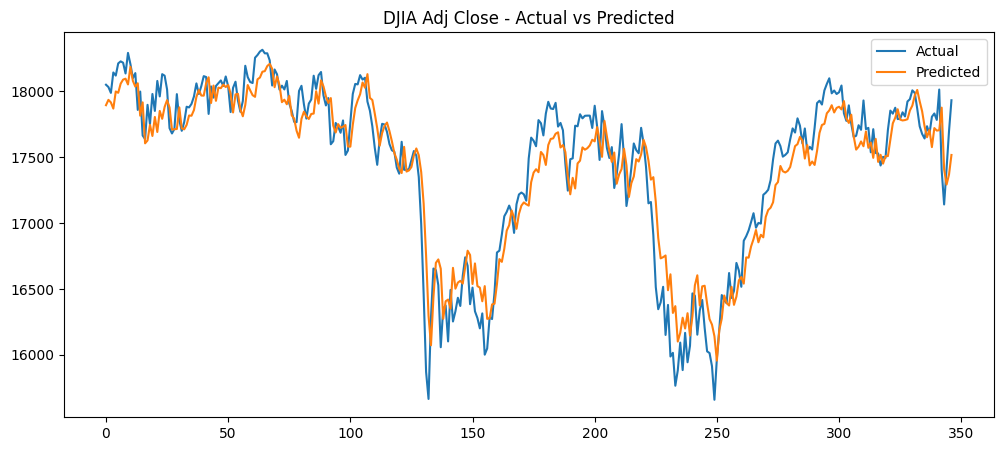

In [ ]:
# Evaluation
y_pred = model.predict(X_test_seq) # Predict stock prices on the test set
y_test_inv = y_scaler.inverse_transform(y_test_seq) # Inverse-transform the normalized true target values back to original scale
y_pred_inv = y_scaler.inverse_transform(y_pred) # Inverse-transform the normalized predicted values back to original scale

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv) # Mean Squared Error
rmse = np.sqrt(mse) # Root Mean Squared Error
mae = mean_absolute_error(y_test_inv, y_pred_inv) # Mean Absolute Error
r2 = r2_score(y_test_inv, y_pred_inv) # R² Score
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv) *100  # Mean Absolute Percentage Error

print(f"📊 MSE: {mse:.4f}")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📈 MAE: {mae:.4f}")
print(f"🎯 R² Score: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")

# Plotting Actual vs Predicted Stock Prices
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.title('DJIA Adj Close - Actual vs Predicted')
plt.show()


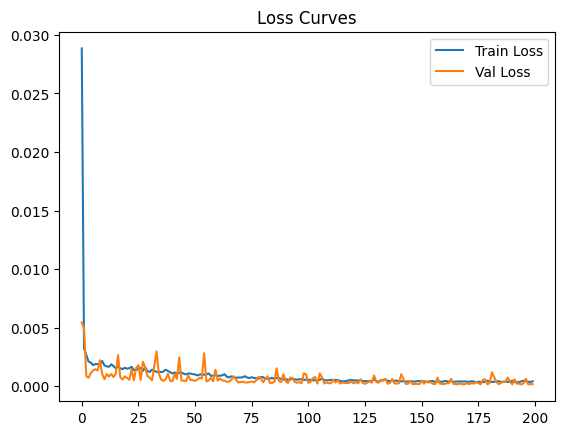

In [ ]:
# training and validation loss curves
plt.plot(history.history['loss'], label='Train Loss') # Plot the training loss over epochs
plt.plot(history.history['val_loss'], label='Val Loss') # Plot the validation loss over epochs
plt.legend()
plt.title('Loss Curves')
plt.show()

In [ ]:
# evaluate the LSTM model's performance using the R² score
train_preds = model.predict(X_train_seq) # Predict target values on the training data
val_preds = model.predict(X_test_seq)  # Predict target values on the test data

print("Train R²:", r2_score(y_train_seq, train_preds)) # Print R² on the training data
print("Val R²:", r2_score(y_test_seq, val_preds)) # Print R² on the test data

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Train R²: 0.9977085790299937
Val R²: 0.8911626971056699
